# Data Preprocessing

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from textstat import syllable_count
from spellchecker import SpellChecker
import string

# Download NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Specify the path to your Excel file
file_path = r'data/restaurant_reviews-v2-1.xlsx'  # Replace with your file path

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())

                         Restaurant  \
0                       Tikka Shack   
1                       Tikka Shack   
2                       Tikka Shack   
3                       Tikka Shack   
4  India Palace\nIndian\nRestaurant   

                                              Review  Real=1/Fake=0  \
0  Great food and great atmosphere! The chicken t...              0   
1  I had heard good things about Tikka Shak so I ...              0   
2  I was driving by tikka shack one day and decid...              0   
3  Tikka Shack had the most modern and up-to-date...              0   
4  Today is the third time I've come to India Pal...              0   

   positive=1/negative=0  AWL  ASL  NOW  NVB  NAJ  NPV  NST  CDV  NTP  TPR  
0                      1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1                      0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2                      0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3                      1  NaN 

[nltk_data] Downloading package punkt to /Users/ha5hkat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ha5hkat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ha5hkat/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ha5hkat/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/ha5hkat/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [5]:
df.head()

,Restaurant,Review,Real=1/Fake=0,positive=1/negative=0,AWL,ASL,NOW,NVB,NAJ,NPV,NST,CDV,NTP,TPR
0,Tikka Shack,Great food and great atmosphere! The chicken t...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tikka Shack,I had heard good things about Tikka Shak so I ...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tikka Shack,I was driving by tikka shack one day and decid...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tikka Shack,Tikka Shack had the most modern and up-to-date...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India Palace\nIndian\nRestaurant,Today is the third time I've come to India Pal...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Initialize spell checker
spell = SpellChecker()

# Function to calculate Average Word Length (AWL)
def average_word_length(text):
    words = [word for word in word_tokenize(text) if word.isalpha()]
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

# Function to calculate Average Sentence Length (ASL)
def average_sentence_length(text):
    sentences = sent_tokenize(text)
    if len(sentences) == 0:
        return 0
    return sum(len(word_tokenize(sentence)) for sentence in sentences) / len(sentences)

# Function to calculate Number of Words (NWO)
def number_of_words(text):
    return len([word for word in word_tokenize(text) if word.isalpha()])

# Function to calculate Number of Verbs (NVB)
def number_of_verbs(text):
    pos_tags = nltk.pos_tag(word_tokenize(text))
    return len([word for word, pos in pos_tags if pos.startswith('VB')])

# Function to calculate Number of Adjectives (NAJ)
def number_of_adjectives(text):
    pos_tags = nltk.pos_tag(word_tokenize(text))
    return len([word for word, pos in pos_tags if pos.startswith('JJ')])

# Function to calculate Number of Passive Voice (NPV)
def number_of_passive_voice(text):
    sentences = sent_tokenize(text)
    passive_count = 0
    for sentence in sentences:
        words = word_tokenize(sentence)
        pos_tags = nltk.pos_tag(words)
        for i in range(len(pos_tags) - 1):
            if pos_tags[i][1] == 'VBN' and pos_tags[i + 1][1] == 'VBD':
                passive_count += 1
    return passive_count

# Function to calculate Number of Sentences (NST)
def number_of_sentences(text):
    return len(sent_tokenize(text))

# Function to calculate Content Diversity (CDV)
def content_diversity(text):
    words = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stopwords.words('english')]
    if len(words) == 0:
        return 0
    unique_words = set(words)
    return len(unique_words) / len(words)

# Function to calculate Number of Typos (NTP)
def number_of_typos(text):
    words = [word for word in word_tokenize(text) if word.isalpha()]
    misspelled = spell.unknown(words)
    return len(misspelled)

# Function to calculate Typo Ratio (TPR)
def typo_ratio(text):
    words = [word for word in word_tokenize(text) if word.isalpha()]
    if len(words) == 0:
        return 0
    misspelled = spell.unknown(words)
    return len(misspelled) / len(words)

In [7]:
# Apply the functions to the Review column
df['AWL'] = df['Review'].apply(average_word_length)
df['ASL'] = df['Review'].apply(average_sentence_length)
df['NWO'] = df['Review'].apply(number_of_words)
df['NVB'] = df['Review'].apply(number_of_verbs)
df['NAJ'] = df['Review'].apply(number_of_adjectives)
df['NPV'] = df['Review'].apply(number_of_passive_voice)
df['NST'] = df['Review'].apply(number_of_sentences)
df['CDV'] = df['Review'].apply(content_diversity)
df['NTP'] = df['Review'].apply(number_of_typos)
df['TPR'] = df['Review'].apply(typo_ratio)

# Display the DataFrame with the new features


In [8]:
df.head()

,Restaurant,Review,Real=1/Fake=0,positive=1/negative=0,AWL,ASL,NOW,NVB,NAJ,NPV,NST,CDV,NTP,TPR,NWO
0,Tikka Shack,Great food and great atmosphere! The chicken t...,0,1,4.674699,17.600000,NaN,15,5,0,5,0.953488,5,0.060241,83
1,Tikka Shack,I had heard good things about Tikka Shak so I ...,0,0,4.112150,19.666667,NaN,27,8,0,6,0.959184,4,0.037383,107
2,Tikka Shack,I was driving by tikka shack one day and decid...,0,0,3.553571,17.428571,NaN,28,6,0,7,0.880952,1,0.008929,112
3,Tikka Shack,Tikka Shack had the most modern and up-to-date...,0,1,4.482759,16.000000,NaN,10,9,0,4,0.925926,1,0.017241,58
4,India Palace\nIndian\nRestaurant,Today is the third time I've come to India Pal...,0,1,4.492958,16.400000,NaN,16,8,0,5,0.945946,0,0.000000,71


In [9]:
df.drop(['NOW'], axis= 1 , inplace= True)

In [10]:
df

,Restaurant,Review,Real=1/Fake=0,positive=1/negative=0,AWL,ASL,NVB,NAJ,NPV,NST,CDV,NTP,TPR,NWO
0,Tikka Shack,Great food and great atmosphere! The chicken t...,0,1,4.674699,17.600000,15,5,0,5,0.953488,5,0.060241,83
1,Tikka Shack,I had heard good things about Tikka Shak so I ...,0,0,4.112150,19.666667,27,8,0,6,0.959184,4,0.037383,107
2,Tikka Shack,I was driving by tikka shack one day and decid...,0,0,3.553571,17.428571,28,6,0,7,0.880952,1,0.008929,112
3,Tikka Shack,Tikka Shack had the most modern and up-to-date...,0,1,4.482759,16.000000,10,9,0,4,0.925926,1,0.017241,58
4,India Palace\nIndian\nRestaurant,Today is the third time I've come to India Pal...,0,1,4.492958,16.400000,16,8,0,5,0.945946,0,0.000000,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Tikka Shack,I usually don't eat outside very often and Tik...,0,1,4.019231,11.800000,10,5,0,5,0.958333,2,0.038462,52
256,Indian Palace Restaurant,The outside of this restaurant in this little ...,1,1,4.261364,20.000000,19,7,0,5,0.950000,0,0.000000,88
257,Indian Palace Restaurant,The food served at this place was at best medi...,0,0,4.478873,12.833333,15,7,0,6,0.852941,2,0.028169,71
258,Royal Indian Cuisine,Their food was worth the wait. Though it took ...,1,1,4.574074,21.333333,9,4,0,3,0.875000,4,0.074074,54


In [11]:
df.to_excel("data/data2.xlsx" , index= False)

# Preprocessed data and computed values for multiple columns 



In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_excel(r"data/data2.xlsx")
df.columns

Index(['Restaurant', 'Review', 'Real=1/Fake=0', 'positive=1/negative=0', 'AWL',
       'ASL', 'NVB', 'NAJ', 'NPV', 'NST', 'CDV', 'NTP', 'TPR', 'NWO'],
      dtype='object')

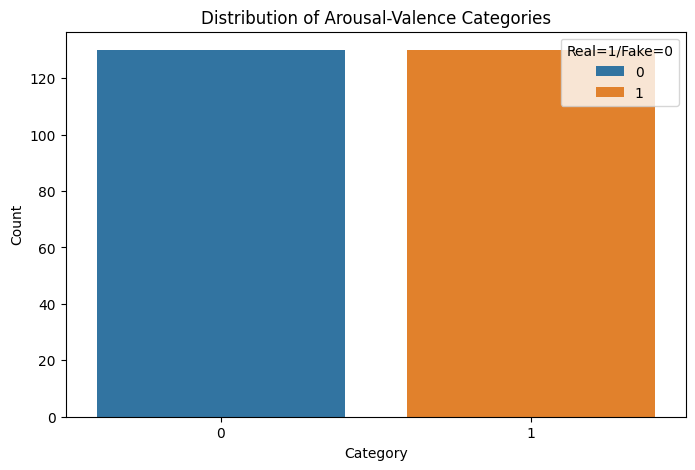

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category

target_col = 'Real=1/Fake=0'
category_counts = df[target_col].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values , hue= category_counts.index)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Arousal-Valence Categories')

# Show the plot
plt.show()



The above plot shows that the both the columns have equal number of target categories (fake / real). There is no need for oversampling.

In [15]:
 df.columns

Index(['Restaurant', 'Review', 'Real=1/Fake=0', 'positive=1/negative=0', 'AWL',
       'ASL', 'NVB', 'NAJ', 'NPV', 'NST', 'CDV', 'NTP', 'TPR', 'NWO'],
      dtype='object')

In [16]:
df.drop(['Restaurant', 'Review'] , axis= 1 , inplace=True)

# Data Visualization


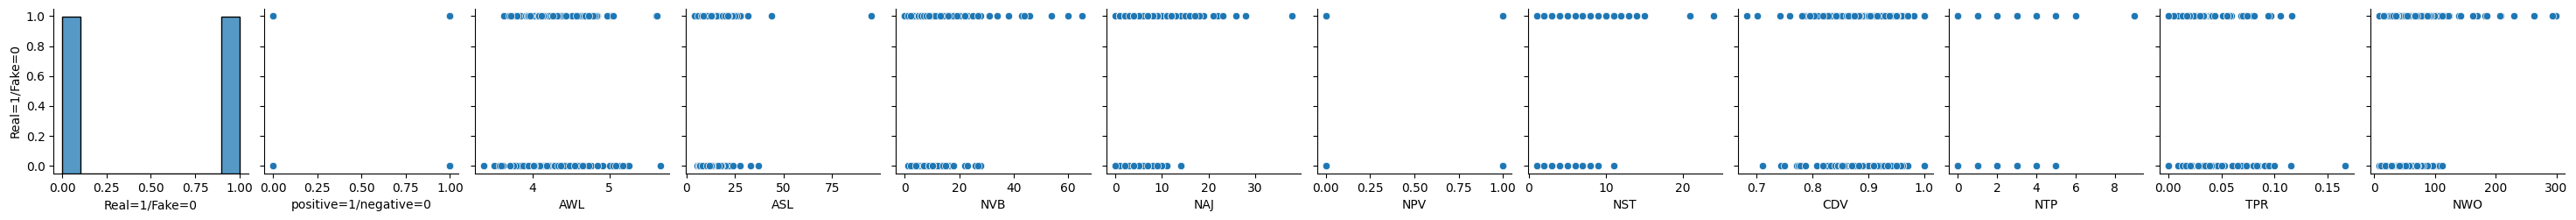

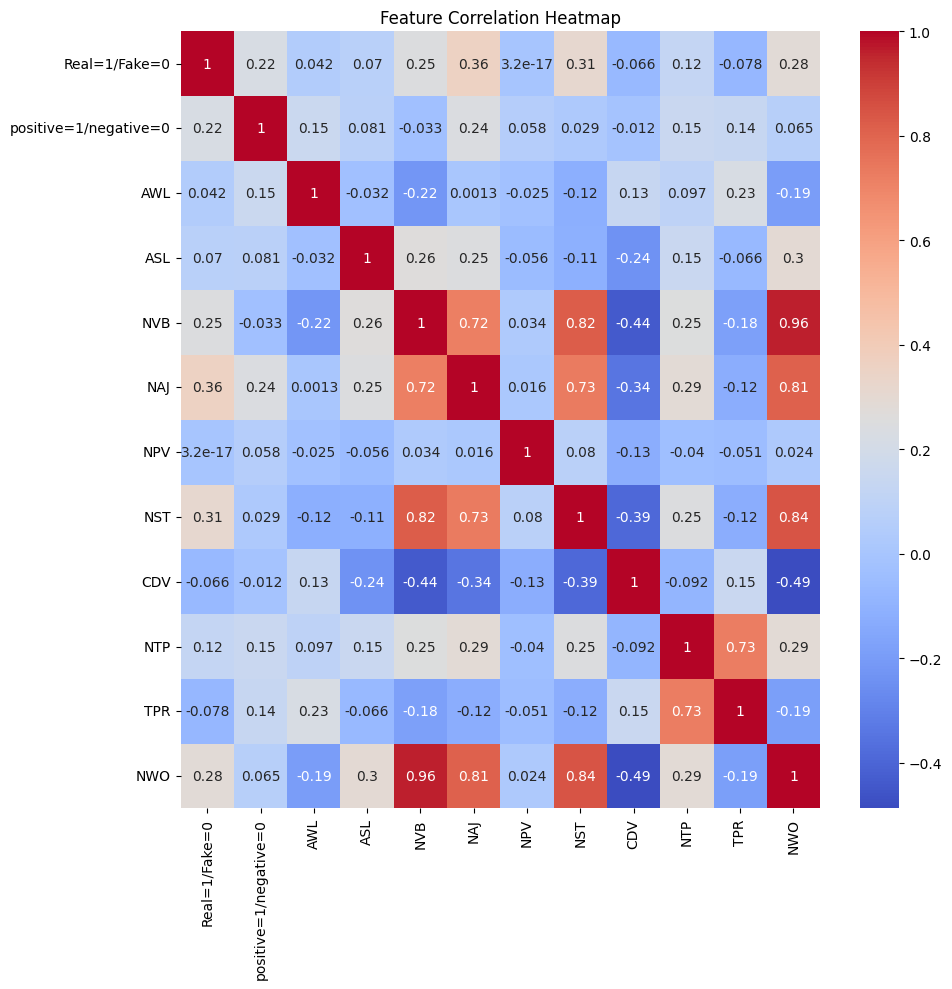

In [ ]:



sns.pairplot(df , y_vars=target_col)


plt.show()

m = 'pearson'

plt.figure(figsize=(10 ,10))

        
correlation_matrix = df.corr(method= m)
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True ,)


plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()



In [ ]:
df

# Outlier Detection

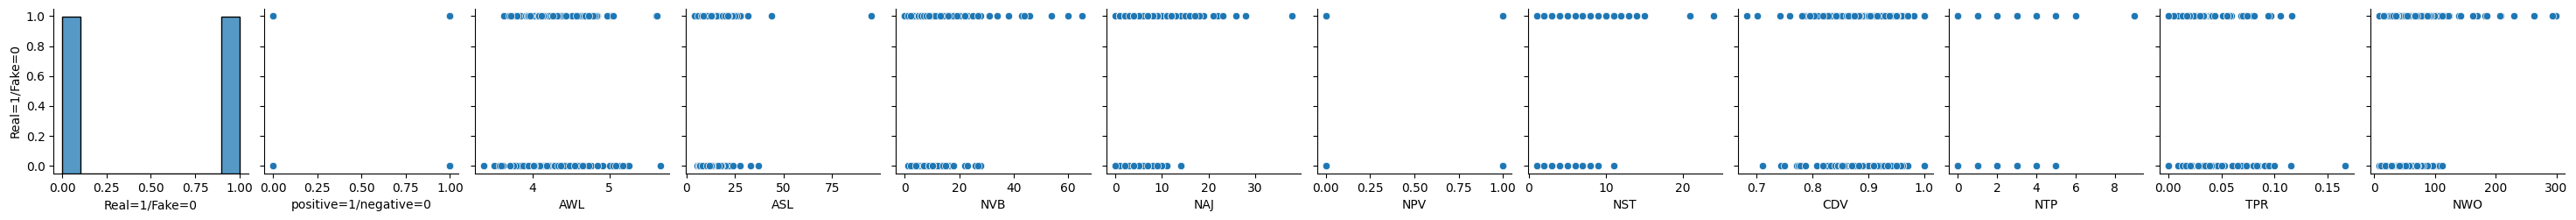

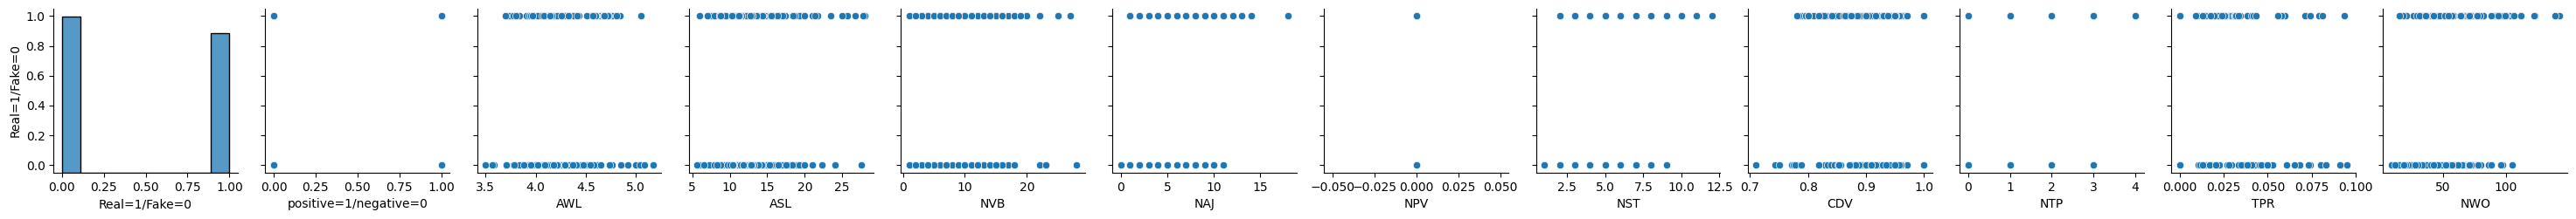

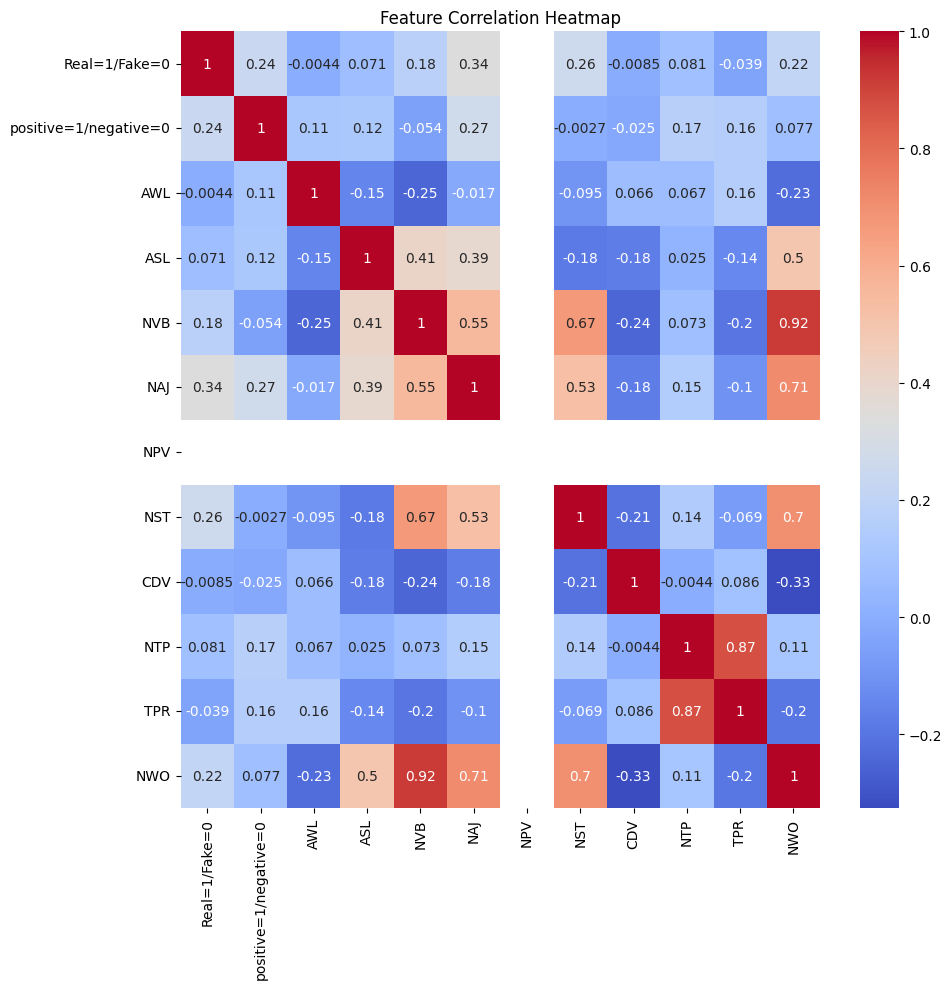

In [20]:
from sklearn.ensemble import IsolationForest

contamination = 0.2 # contamination=0.2 means 20% outliers expected

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=contamination, random_state=42)  # contamination=0.2 means 20% outliers expected

# Fit the model and predict outliers
outlier_preds = iso_forest.fit_predict(df)

# '1' indicates inliers (normal points), '-1' indicates outliers
df_no_outliers = df[outlier_preds == 1]  # Keep only normal points (inliers)





df_no_outliers.describe()



sns.pairplot(df , y_vars=target_col)
sns.pairplot(df_no_outliers , y_vars=target_col)

plt.show()




plt.figure(figsize=(10 ,10))

correlation_matrix = df_no_outliers.corr(method= "pearson")
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)


plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()



In [8]:
X

,positive=1/negative=0,AWL,ASL,NVB,NAJ,NPV,NST,CDV,NTP,TPR,NWO
0,1,4.674699,17.600000,15,5,0,5,0.953488,5,0.060241,83
1,0,4.112150,19.666667,27,8,0,6,0.959184,4,0.037383,107
2,0,3.553571,17.428571,28,6,0,7,0.880952,1,0.008929,112
3,1,4.482759,16.000000,10,9,0,4,0.925926,1,0.017241,58
4,1,4.492958,16.400000,16,8,0,5,0.945946,0,0.000000,71
...,...,...,...,...,...,...,...,...,...,...,...
255,1,4.019231,11.800000,10,5,0,5,0.958333,2,0.038462,52
256,1,4.261364,20.000000,19,7,0,5,0.950000,0,0.000000,88
257,0,4.478873,12.833333,15,7,0,6,0.852941,2,0.028169,71
258,1,4.574074,21.333333,9,4,0,3,0.875000,4,0.074074,54


# Feature Selection

In [102]:
X = df[['positive=1/negative=0', 'AWL', 'ASL', 'NVB', 'NAJ', 'NPV', 'NST', 'CDV', 'NTP', 'TPR', 'NWO' ]]
y = df['Real=1/Fake=0']

# Boruta 

In [112]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

from sklearn.metrics import classification_report , f1_score , precision_score , recall_score, confusion_matrix , make_scorer, accuracy_score
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  GradientBoostingClassifier , RandomForestClassifier
from xgboost import XGBClassifier


from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

import pickle

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from boruta import BorutaPy
from sklearn.datasets import load_iris



# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Boruta
boruta = BorutaPy(
    estimator=rf, 
    n_estimators='auto',  # Use the same number of trees as in the Random Forest
    max_iter=50,  # Number of iterations
    random_state=42,
    verbose=2  # Print progress
)

# Fit Boruta
boruta.fit(X.values, y)

# Results
selected_features = X.columns[boruta.support_]
print("Selected Features:", selected_features)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	1
Tentative: 	5
Rejected: 	5
Iteration: 	9 / 50
Confirmed: 	1
Tentative: 	5
Rejected: 	5
Iteration: 	10 / 50
Confirmed: 	1
Tentative: 	5
Rejected: 	5
Iteration: 	11 / 50
Confirmed: 	1
Tentative: 	5
Rejected: 	5
Iteration: 	12 / 50
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	13 / 50
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	14 / 50
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	15 / 50
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	16 / 50
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	17 / 50
Confir

In [34]:
selected_features

Index(['NAJ', 'NWO'], dtype='object')

In [35]:
X = X[selected_features]

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define MLP Classifier
mlp = MLPClassifier(max_iter=500, random_state=42)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (32, 32), (64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_mlp = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.4s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.5s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.7s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.3s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activ

/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total t

/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.7s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.3s
[CV] END activation

/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.4s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.

/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] 

/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV]

/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] EN

/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.6s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.1s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh

/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.4s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), learning_rate_init=0.001; total time=   0.6s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s


/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hkat/SJSU/ML/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ha5hk

[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.6s
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01}
Test Accuracy: 0.6923
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74        26
           1       0.81      0.50      0.62        26

    

# Model Training

In [ ]:
# y = pd.DataFrame(y)

In [114]:
# Split into train (80%) and temp (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
X_train

,positive=1/negative=0,AWL,ASL,NVB,NAJ,NPV,NST,CDV,NTP,TPR,NWO
60,0,3.918919,43.600000,46,6,0,5,0.741573,3,0.016216,185
247,0,4.491228,16.500000,14,2,0,4,0.846154,0,0.000000,57
16,1,4.135135,11.857143,16,5,0,7,0.942857,0,0.000000,74
55,0,4.129870,11.250000,13,5,0,8,0.948718,0,0.000000,77
125,0,4.586957,9.500000,11,5,0,6,1.000000,0,0.000000,46
...,...,...,...,...,...,...,...,...,...,...,...
20,1,4.722222,7.833333,4,7,0,6,0.913043,2,0.055556,36
188,1,3.953125,14.400000,13,9,0,5,0.928571,0,0.000000,64
71,0,4.388889,9.285714,11,5,0,7,0.838710,1,0.018519,54
106,0,4.075000,12.857143,18,8,0,7,0.894737,0,0.000000,80


In [116]:
# Print dataset sizes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (208, 11)
Test set size: (52, 11)


In [117]:
# y_train = y_train["Real=1/Fake=0"]


In [118]:
def w_f1_score(y_test , y_pred) :
    return f1_score(y_test , y_pred )

cs = make_scorer(w_f1_score)

In [121]:
# model = GradientBoostingClassifier()

# # Define the search space
# search_space = {
#     'n_estimators': Integer(20, 500),
#     'learning_rate': Real(0.01, 0.3),
#     'max_depth': Integer(3, 10),
#     'min_samples_split': Integer(2, 10),
#     'min_samples_leaf': Integer(1, 5)
# }

# model = RandomForestClassifier()

# search_space = {
#         'n_estimators': Integer(50, 500),
#         'max_depth': Integer(3, 20),
#         'min_samples_split': Integer(2, 10),
#         'min_samples_leaf': Integer(1, 5)
# }


# # Define MLP Classifier
# model = MLPClassifier(max_iter=500, random_state=42)

# # Define hyperparameter grid
# search_space = {
#     'hidden_layer_sizes': [(32,), (64,), (32, 32), (64, 32)],
#     'activation': ['relu', 'tanh'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate_init': [0.001, 0.01]
# }


model = XGBClassifier()
search_space = {
    'n_estimators': Integer(100, 500),
    'learning_rate': Real(0.01, 0.3),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0)
}



In [122]:


cv = KFold(n_splits=5 ,shuffle= True, random_state=42)

# Perform Bayesian Optimization with Cross-Validation
bayes_search = BayesSearchCV(model , search_spaces=search_space, n_iter=30, cv=cv, scoring= cs , n_jobs=-1, random_state=42)
bayes_search.fit(X_train, y_train)

# Best parameters and cross-validation accuracy
print("Best Parameters:", bayes_search.best_params_)
print("Best Cross-Validation F1:", bayes_search.best_score_)


Best Parameters: OrderedDict({'colsample_bytree': 0.7224162561505759, 'learning_rate': 0.27642953128411935, 'max_depth': 4, 'n_estimators': 273, 'subsample': 0.5939775931836743})
Best Cross-Validation F1: 0.6544227948879111


In [123]:
# bayes_search.optimizer_results_

In [124]:
# model = MLPClassifier(**bayes_search.best_params_)
model = XGBClassifier(**bayes_search.best_params_)



In [125]:
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

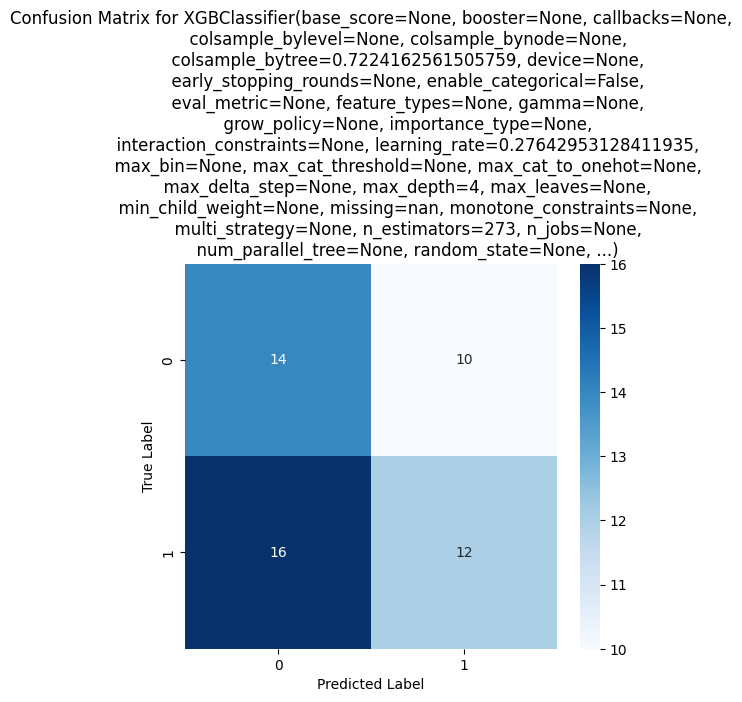

In [126]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
class_names = ['0', '1']

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for {model}")
plt.show()

In [127]:

# Best parameters and cross-validation accuracy
print("Best Parameters:", bayes_search.best_params_)
print("Best Cross-Validation F1:", bayes_search.best_score_)

print(classification_report(y_test , y_pred))


precision = precision_score(y_test , y_pred)
f1 = f1_score(y_test , y_pred )
recall = recall_score(y_test , y_pred )


print(f"{precision= } {f1= } {recall= }")




Best Parameters: OrderedDict({'colsample_bytree': 0.7224162561505759, 'learning_rate': 0.27642953128411935, 'max_depth': 4, 'n_estimators': 273, 'subsample': 0.5939775931836743})
Best Cross-Validation F1: 0.6544227948879111
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        24
           1       0.55      0.43      0.48        28

    accuracy                           0.50        52
   macro avg       0.51      0.51      0.50        52
weighted avg       0.51      0.50      0.50        52

precision= 0.5454545454545454 f1= 0.48 recall= 0.42857142857142855


In [128]:
print(f1_score(y_test , y_pred ))

0.48


In [130]:



import json


model_results = {
    "model" : f"{model}",
    "Cross-Validation F1" : bayes_search.best_score_,
    "Accuracy" : accuracy_score(y_test , y_pred),
    "Precision" : precision,
    "Recall" : recall,
    "F1" : f1
}

print(model_results)


# File path
file_path = r"logs/metrics.json"

# Read the existing data from the file
try:
    with open(file_path, "r") as file:
        data = json.load(file)  # Load existing data
except (FileNotFoundError, json.JSONDecodeError):
    data = []  # Initialize as empty list if file doesn't exist or is empty

# Append new data
data.append(model_results)

# Write the updated data back to the file
with open(file_path, "w") as file:
    json.dump(data, file, indent=4)


{'model': 'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=0.7224162561505759, device=None,\n              early_stopping_rounds=None, enable_categorical=False,\n              eval_metric=None, feature_types=None, gamma=None,\n              grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=0.27642953128411935,\n              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=4, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=273, n_jobs=None,\n              num_parallel_tree=None, random_state=None, ...)', 'Cross-Validation F1': np.float64(0.6544227948879111), 'Accuracy': 0.5, 'Precision': 0.5454545454545454, 'Recall': 0.42857142857142855, 'F1': 0.48}
